<a href="https://colab.research.google.com/github/LukeZingg/MAT421/blob/main/Module_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**20.1 - Numerical Differentiation Problem Statement**

An evenly spaced set of points over a function’s domain within an interval is called a numerical grid. The distance between adjacent points is known as the spacing or step size.

In Python, we can represent functions over an interval by computing values on the grid, which is useful for numerical calculations. This can be especially handy when we only have access to data at discrete timestamps, despite the underlying relationship being a continuous function.

Both analytic functions and discrete representations offer methods for approximating derivatives on a numerical grid.

**20.2 Finite Difference Approximating Derivatives**

When computing the exact derivative of a function is impractical, we can estimate it using finite difference approximations. This involves calculating the slope between two nearby points and using these slopes to approximate the derivative. In Python, we can perform this process and compare the exact derivative with its finite difference approximation.

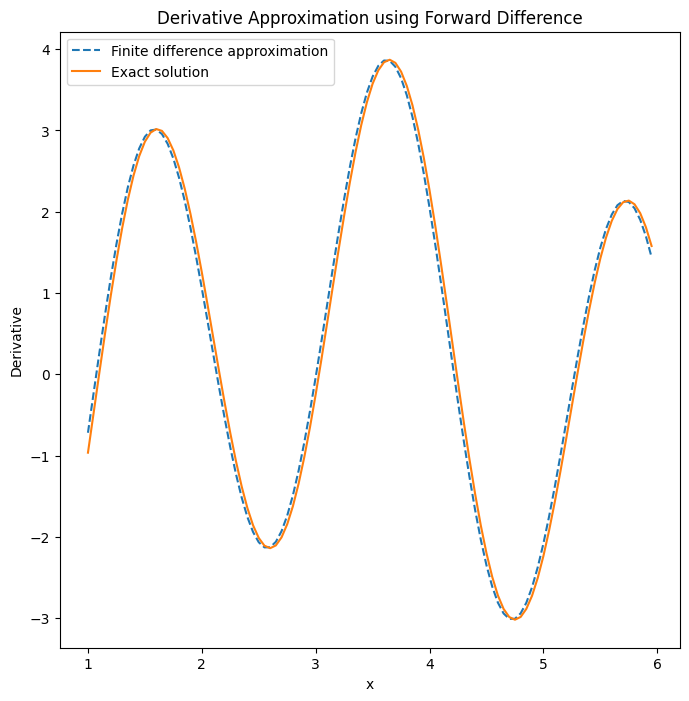

In [5]:
import numpy as np
import matplotlib.pyplot as plt

h = 0.05  # Step size
x = np.arange(1, 6 + h, h)  # Domain [1,6]
y = np.cos(3*x) - np.sin(x)  # Function f(x) = cos(3x) - sin(x)

# Compute forward differences
forward_diff = np.diff(y) / h
x_diff = x[:-1]  # Corresponding x values

# Compute exact derivative: f'(x) = -3sin(3x) - cos(x)
exact_solution = -3 * np.sin(3*x_diff) - np.cos(x_diff)

# Plot the results
plt.figure(figsize=(8, 8))
plt.plot(x_diff, forward_diff, '--', label='Finite difference approximation')
plt.plot(x_diff, exact_solution, label='Exact solution')
plt.legend()
plt.xlabel('x')
plt.ylabel("Derivative")
plt.title("Derivative Approximation using Forward Difference")
plt.show()

We can compute the maximum error or difference between the exact solution and the finite difference approximation to see by how little they differ:

In [6]:
# Compute max error
max_error = np.max(np.abs(exact_solution - forward_diff))
print("Max Error:", max_error)

Max Error: 0.24636438769145486


**20.3 - Approximating of Higher Order Derivatives**

If we desire to approximate higher-order derivatives, such as f''(x) or f'''(x), we can employ Taylor Series to create finite difference approximations.

**20.4 - Numerical Differentiation with Noise**

Sometimes, data collected at discrete timestamps contains noise due to rounding errors, unmeasured factors, or even uncontrollable environmental noise.

In Python, we can model the impact of noise on a variable. For example, consider the following function that represents a relationship both with and without noise:

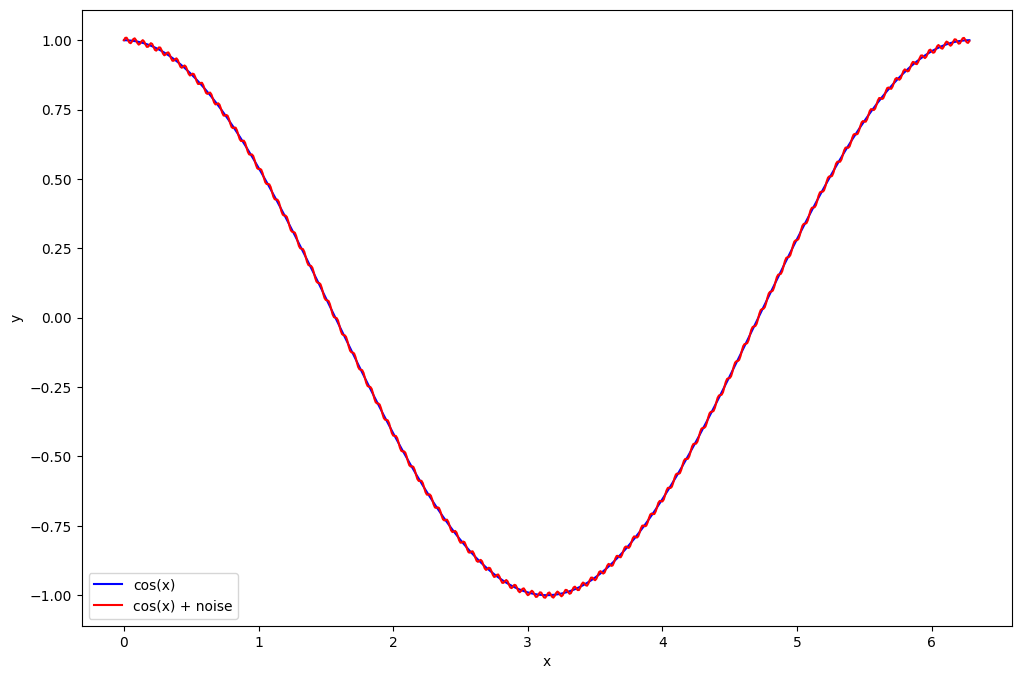

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(0, 2*np.pi, 0.01)
# compute function
omega = 100
epsilon = 0.01

y = np.cos(x)
y_noise = y + epsilon*np.sin(omega*x)

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x, y, 'b-', \
         label = 'cos(x)')
plt.plot(x, y_noise, 'r-', \
         label = 'cos(x) + noise')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()


While noise may have a minor effect on the overall shape of a function, it can significantly alter its derivative. This can greatly impact results and must be carefully managed in practical applications.

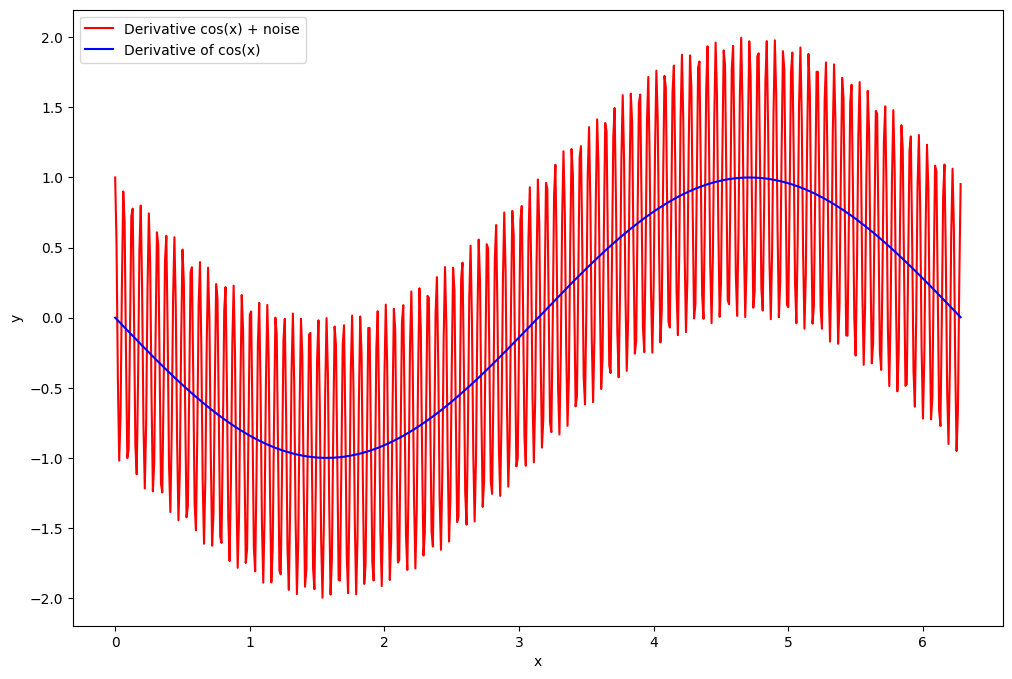

In [9]:
x = np.arange(0, 2*np.pi, 0.01)
# compute function
y = -np.sin(x)
y_noise = y + epsilon*omega*np.cos(omega*x)

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x, y_noise, 'r-', \
         label = 'Derivative cos(x) + noise')
plt.plot(x, y, 'b-', \
         label = 'Derivative of cos(x)')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()
